In [2]:
import pandas as pd
# Set display options
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

import pickle

In [3]:
pkl_path = "../final_artifacts/merge_cfb_ref_pfb_ref_output.pkl"

with open(pkl_path, 'rb') as f:
    df = pickle.load(f)

display(f'rows : {len(df)}; cols: {len(df.columns)}')

display(len(df))

x=10
display(df.iloc[:,:x].head())
display(df.iloc[:,x:].head())

'rows : 540; cols: 27'

540

,player,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%
0,Greg Cook,29,332,655,50.7,4906,34,5.2,35,5.3
1,Marty Domres,27,368,702,52.4,4492,24,3.4,38,5.4
2,Terry Hanratty,29,304,550,55.3,4152,27,4.9,34,6.2
3,Bobby Douglass,30,183,379,48.3,2817,20,5.3,20,5.3
4,Al Woodall,20,118,221,53.4,1501,4,1.8,13,5.9


,Y/A,AY/A,Y/C,Y/G,Rate,ht_in,wt,college,draft_yr,round,pick,nfl_success,win_success,stats_success,metrics_success,longevity_success,superbowl_success
0,7.5,6.12,14.8,169.2,120.0,76.0,220.0,Cincinnati,1969,1,5,0,0,0,0,0,0
1,6.4,4.65,12.2,166.4,106.6,76.0,220.0,Columbia,1969,1,9,0,0,0,0,1,0
2,7.5,5.75,13.7,143.2,122.5,73.0,210.0,Notre Dame,1969,2,30,0,0,0,0,0,1
3,7.4,6.11,15.4,93.9,117.6,76.0,225.0,Kansas,1969,2,41,0,0,0,0,1,0
4,6.8,4.51,12.7,75.1,104.7,77.0,205.0,Duke,1969,2,52,0,0,0,0,0,0


#### I. Data Preparation
1. Investigate Data
2. Handle NA Values: SimpleImputer() to fill or remove NA values.
3. Compute Correlation Matrix ()  (before scaling to keep original values intact for more accurate correlation matrix).
4. Train-Test Split (prepare data for model training and evaluation).
5. Standard Scaling (ensure your features are on the same scale): StandardScaler()

#### II. Modeling
1. Model (create model)
2. Fit (train model)
3. Evaluate Training Model fit (accuracy_score/score on training data)
4. Predict (accuracy_score/score)
5. Evaluate Model (accuracy_score/score on y test data (actual data)  vs. predictions)

#### III. Optimization / Hyperparameter Tuning
1. Grid Search

#### IV. Re-Model / Evaluate with Optimized Params/Methods/Hyperparameters

#### I. Data Preparation
1. Investigate Data

In [4]:
# display(df.info())
x=17
display(df.iloc[:,:x].head())
display(df.iloc[:,x:].head())
display(df.columns)


filtered_df = df.iloc[:,:21]
filtered_df.head()
cols_to_drop =  ['player', 'college', 'draft_yr']
filtered_df.drop(columns=cols_to_drop, inplace=True)

display(filtered_df.head())
# display(filtered_df.iloc[:,:x].head())
# display(filtered_df.iloc[:,x:].head())
display(filtered_df.columns)

,player,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Y/A,AY/A,Y/C,Y/G,Rate,ht_in,wt
0,Greg Cook,29,332,655,50.7,4906,34,5.2,35,5.3,7.5,6.12,14.8,169.2,120.0,76.0,220.0
1,Marty Domres,27,368,702,52.4,4492,24,3.4,38,5.4,6.4,4.65,12.2,166.4,106.6,76.0,220.0
2,Terry Hanratty,29,304,550,55.3,4152,27,4.9,34,6.2,7.5,5.75,13.7,143.2,122.5,73.0,210.0
3,Bobby Douglass,30,183,379,48.3,2817,20,5.3,20,5.3,7.4,6.11,15.4,93.9,117.6,76.0,225.0
4,Al Woodall,20,118,221,53.4,1501,4,1.8,13,5.9,6.8,4.51,12.7,75.1,104.7,77.0,205.0


,college,draft_yr,round,pick,nfl_success,win_success,stats_success,metrics_success,longevity_success,superbowl_success
0,Cincinnati,1969,1,5,0,0,0,0,0,0
1,Columbia,1969,1,9,0,0,0,0,1,0
2,Notre Dame,1969,2,30,0,0,0,0,0,1
3,Kansas,1969,2,41,0,0,0,0,1,0
4,Duke,1969,2,52,0,0,0,0,0,0


Index(['player', 'G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%',
       'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'ht_in', 'wt', 'college',
       'draft_yr', 'round', 'pick', 'nfl_success', 'win_success',
       'stats_success', 'metrics_success', 'longevity_success',
       'superbowl_success'],
      dtype='object')

,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Y/A,AY/A,Y/C,Y/G,Rate,ht_in,wt,round,pick
0,29,332,655,50.7,4906,34,5.2,35,5.3,7.5,6.12,14.8,169.2,120.0,76.0,220.0,1,5
1,27,368,702,52.4,4492,24,3.4,38,5.4,6.4,4.65,12.2,166.4,106.6,76.0,220.0,1,9
2,29,304,550,55.3,4152,27,4.9,34,6.2,7.5,5.75,13.7,143.2,122.5,73.0,210.0,2,30
3,30,183,379,48.3,2817,20,5.3,20,5.3,7.4,6.11,15.4,93.9,117.6,76.0,225.0,2,41
4,20,118,221,53.4,1501,4,1.8,13,5.9,6.8,4.51,12.7,75.1,104.7,77.0,205.0,2,52


Index(['G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'ht_in', 'wt', 'round', 'pick'],
      dtype='object')

In [5]:
# Check balance of the y/target data.
df['nfl_success'].value_counts()

nfl_success
0    383
1    157
Name: count, dtype: int64

In [6]:
# Set X feature data to be the College Football statistical data 
# Set the aggregate nfl_success to be the y target data

y = df['nfl_success']
X = filtered_df
X.columns

Index(['G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'ht_in', 'wt', 'round', 'pick'],
      dtype='object')

In [7]:
# Filter DataFrame to columns of interest.

df[['G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'ht_in', 'wt', 'round', 'pick',
       'nfl_success'
       ]].head()

,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Y/A,AY/A,Y/C,Y/G,Rate,ht_in,wt,round,pick,nfl_success
0,29,332,655,50.7,4906,34,5.2,35,5.3,7.5,6.12,14.8,169.2,120.0,76.0,220.0,1,5,0
1,27,368,702,52.4,4492,24,3.4,38,5.4,6.4,4.65,12.2,166.4,106.6,76.0,220.0,1,9,0
2,29,304,550,55.3,4152,27,4.9,34,6.2,7.5,5.75,13.7,143.2,122.5,73.0,210.0,2,30,0
3,30,183,379,48.3,2817,20,5.3,20,5.3,7.4,6.11,15.4,93.9,117.6,76.0,225.0,2,41,0
4,20,118,221,53.4,1501,4,1.8,13,5.9,6.8,4.51,12.7,75.1,104.7,77.0,205.0,2,52,0


In [8]:
# Investigate non-number/NaN counts

nan_counts = X.isna().sum()
print(len(X))
print(X.info())
print(nan_counts)

540
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       540 non-null    object 
 1   Cmp     540 non-null    object 
 2   Att     540 non-null    object 
 3   Cmp%    540 non-null    object 
 4   Yds     540 non-null    object 
 5   TD      540 non-null    object 
 6   TD%     540 non-null    object 
 7   Int     540 non-null    object 
 8   Int%    540 non-null    object 
 9   Y/A     540 non-null    object 
 10  AY/A    540 non-null    object 
 11  Y/C     540 non-null    object 
 12  Y/G     540 non-null    object 
 13  Rate    540 non-null    object 
 14  ht_in   540 non-null    Float64
 15  wt      539 non-null    Float64
 16  round   540 non-null    Int64  
 17  pick    540 non-null    Int64  
dtypes: Float64(2), Int64(2), object(14)
memory usage: 78.2+ KB
None
G        0
Cmp      0
Att      0
Cmp%     0
Yds      0
TD       0
TD%      0
Int  

#### I. Data Preparation
2. Handle NA Values: SimpleImputer() to fill or remove NA values.
begin with mean value strategy

In [9]:
from sklearn.impute import SimpleImputer

# Convert all data to numeric, forcing errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Initialize the SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the DataFrame and transform it
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print(X_imputed[:10])

# # replace NaN with 0
# X0 = X.fillna(0)

      G    Cmp    Att  Cmp%     Yds    TD   TD%   Int  Int%  Y/A  AY/A   Y/C  \
0  29.0  332.0  655.0  50.7  4906.0  34.0   5.2  35.0   5.3  7.5  6.12  14.8   
1  27.0  368.0  702.0  52.4  4492.0  24.0   3.4  38.0   5.4  6.4  4.65  12.2   
2  29.0  304.0  550.0  55.3  4152.0  27.0   4.9  34.0   6.2  7.5  5.75  13.7   
3  30.0  183.0  379.0  48.3  2817.0  20.0   5.3  20.0   5.3  7.4  6.11  15.4   
4  20.0  118.0  221.0  53.4  1501.0   4.0   1.8  13.0   5.9  6.8  4.51  12.7   
5  30.0  166.0  404.0  41.1  1937.0   7.0   1.7  19.0   4.7  4.8  3.02  11.7   
6  27.0  148.0  280.0  52.9  2327.0  30.0  10.7  20.0   7.1  8.3  7.24  15.7   
7  30.0  235.0  444.0  52.9  3940.0  23.0   5.2  23.0   5.2  8.9  7.58  16.8   
8  30.0  207.0  370.0  55.9  2432.0  16.0   4.3  21.0   5.7  6.6  4.88  11.7   
9  30.0  180.0  303.0  59.4  2196.0  18.0   5.9  18.0   5.9  7.2  5.76  12.2   

     Y/G   Rate  ht_in     wt  round   pick  
0  169.2  120.0   76.0  220.0    1.0    5.0  
1  166.4  106.6   76.0  220

#### I. Data Preparation
3. Compute Correlation Matrix ()  
done before scaling to keep original values intact for more accurate correlation matrix

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

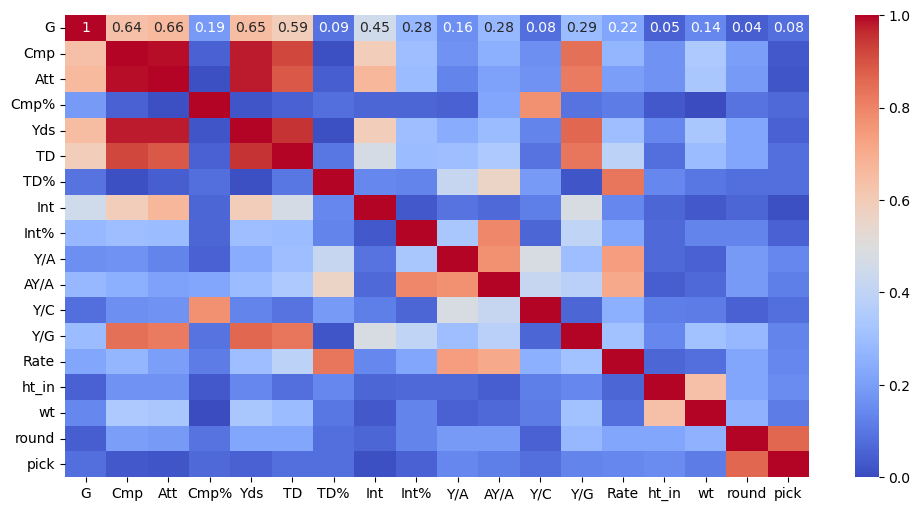

<Figure size 640x480 with 0 Axes>

"highly correlated data (0 for NA replacement): ['Att', 'Yds', 'TD', 'Y/G', 'Rate', 'pick']"

In [11]:
# Calculate correlation matrix of X data (0 for NA replacement):
X_corr_matrix = X_imputed.corr().abs().round(2)

# Plot heatmaps
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed
sns.heatmap(X_corr_matrix, annot=True, cmap='coolwarm')
f = plt.figure()
plt.show()

# Select upper triangle of correlation matrix
upper = X_corr_matrix.where(np.triu(np.ones(X_corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]
display(f'highly correlated data (0 for NA replacement): {high_corr}')

once you've handled missing data using SimpleImputer and have your imputed dataset (X_imputed), 
the next logical steps are to:
 apply scaling (with StandardScaler) and then 
 split the dataset into training and testing sets using train_test_split.

#### I. Data Preparation
4. Train-Test Split
prepare data for model training and evaluation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

#### I. Data Preparation
5. Standard Scaling
ensure your features are on the same scale: StandardScaler()

In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
X_scaler = StandardScaler()
# Fit the Standard Scaler with the training data 
X_scaler.fit(X_train)
# Scale the TRAINING DATA and TEST DATA SEPARATELY with the Transform Function
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### II. Modeling
1. Model (create model)

#### II. Modelin
2. Fit (train model)

#### II. Modeling
3. Evaluate Training Model fit (accuracy_score/score on training data)

#### II. Modeling
4. Predict (accuracy_score/score)

#### II. Modeling
5. Evaluate Model (accuracy_score/score on y test data (actual data)  vs. predictions)

#### III. Optimization / Hyperparameter Tuning
1. Grid Search

#### IV. Re-Model / Evaluate with Optimized Params/Methods/Hyperparameters